In [195]:
import pandas as pd
import numpy as np 
import function_initial as fn
import function_frac_wind as  ffw
import matplotlib.pyplot as  plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [196]:
import mplfinance as mpf


In [197]:
df_i= ffw.read_file('Initial_cleaned_data.csv')

In [198]:
df = fn.initialization(df_i,'SBL','2019-07-19','2019-08-30')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30989 to 35831
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      30 non-null     datetime64[ns]
 1   Symbol    30 non-null     object        
 2   LTP       30 non-null     float64       
 3   %Change   30 non-null     float64       
 4   High      30 non-null     float64       
 5   Low       30 non-null     float64       
 6   Open      30 non-null     float64       
 7   Quantity  30 non-null     float64       
 8   Turnover  30 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.3+ KB


In [200]:
df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover
30989,2019-07-21,SBL,327.0,0.00,327.0,321.0,321.0,18223.0,5867285.0
31158,2019-07-22,SBL,324.0,-0.92,327.0,323.0,326.0,13483.0,4376663.0
31323,2019-07-23,SBL,326.0,0.62,328.0,324.0,324.0,23573.0,7672034.0
31491,2019-07-24,SBL,327.0,0.31,329.0,326.0,329.0,41655.0,13637949.0
31661,2019-07-25,SBL,324.0,-0.92,327.0,322.0,327.0,21422.0,6946170.0
31827,2019-07-28,SBL,321.0,-0.93,321.0,318.0,320.0,14468.0,4626429.0
31991,2019-07-29,SBL,320.0,-0.31,325.0,320.0,325.0,18523.0,5937565.0
32333,2019-07-30,SBL,322.0,0.62,325.0,315.0,317.0,14950.0,4804360.0
32499,2019-07-31,SBL,324.0,0.62,325.0,321.0,321.0,8971.0,2899063.0
33350,2019-08-01,SBL,322.0,-0.62,327.0,321.0,325.0,18341.0,5908046.0


In [201]:
df = df.reset_index()


In [202]:
df = df.drop('index',axis=1)

In [203]:
fn.plotly_plot_line(df,'Date','LTP','SBL')

In [204]:
#method 1: fractal candlestick pattern
# determine bullish fractal 
def is_support(df,i):  
  cond1 = df['Low'][i] < df['Low'][i-1]   
  cond2 = df['Low'][i] < df['Low'][i+1]   
  cond3 = df['Low'][i+1] < df['Low'][i+2]   
  cond4 = df['Low'][i-1] < df['Low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 


# determine bearish fractal
def is_resistance(df,i):  
  cond1 = df['High'][i] > df['High'][i-1]   
  cond2 = df['High'][i] > df['High'][i+1]   
  cond3 = df['High'][i+1] > df['High'][i+2]   
  cond4 = df['High'][i-1] > df['High'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)

In [205]:
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0



In [206]:
n = df.shape[0]-2

In [207]:
df[['Date','Open','High','Low','LTP']]

,Date,Open,High,Low,LTP
0,2019-07-21,321.0,327.0,321.0,327.0
1,2019-07-22,326.0,327.0,323.0,324.0
2,2019-07-23,324.0,328.0,324.0,326.0
3,2019-07-24,329.0,329.0,326.0,327.0
4,2019-07-25,327.0,327.0,322.0,324.0
5,2019-07-28,320.0,321.0,318.0,321.0
6,2019-07-29,325.0,325.0,320.0,320.0
7,2019-07-30,317.0,325.0,315.0,322.0
8,2019-07-31,321.0,325.0,321.0,324.0
9,2019-08-01,325.0,327.0,321.0,322.0


In [208]:
levels = []
for i in range(2, n):  
  if is_support(df, i):    
    low = df['Low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))     
                

In [209]:
# for visualization
def plot_all(levels,df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df[['Date','Open','High','Low','LTP']],width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

ValueError: not enough values to unpack (expected 5, got 4)

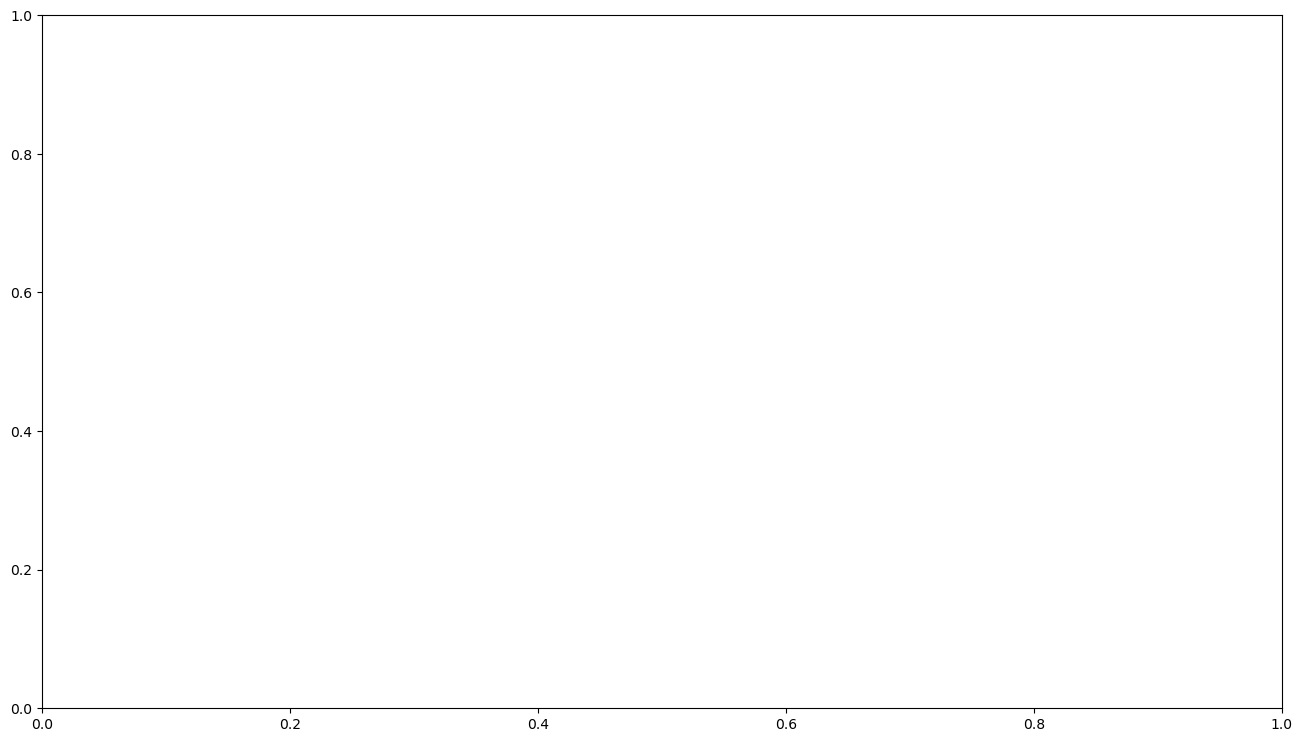

In [210]:
plot_all(levels,df)